# FIND BEST THRESHOLD VALUE FOR GALAXY DUST MASK

In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

## Find best threshold

Load the HFI 353 GHz map from the FITS file downloaded from the Planck Legacy Archive (PLA) and make a pre elaboration.

In [2]:
hfi353 = hp.read_map("/mnt/d/Tesi/data/MilkyWay/HFI_SkyMap_353-psb_2048_R3.01_full.fits")

# Reduce the resolution of the map in order to save memory and computational time
print("Changing resolution")
hfi353 = hp.ud_grade(hfi353, 512)

## Rotate the map from Galactic to Ecliptic coordinates
print("Rotate")
rotator = hp.rotator.Rotator(coord=["G","E"])
hfi353 = rotator.rotate_map_pixel(hfi353)

## Apply a smoothing filter to the map
print("Smoothing filter")
hfi353 = hp.smoothing(hfi353, fwhm=np.deg2rad(1.0), verbose=False)

## Normalize the pixel values
print("Normalize pixel values")
hfi353 -= np.min(hfi353)
hfi353 /= np.max(hfi353)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/paolo/.miniconda3/envs/idp/lib/python3.6/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING
Changing resolution
Rotate
Smoothing filter
Normalize pixel values


Explore threshold values.

Threshold: 0.005


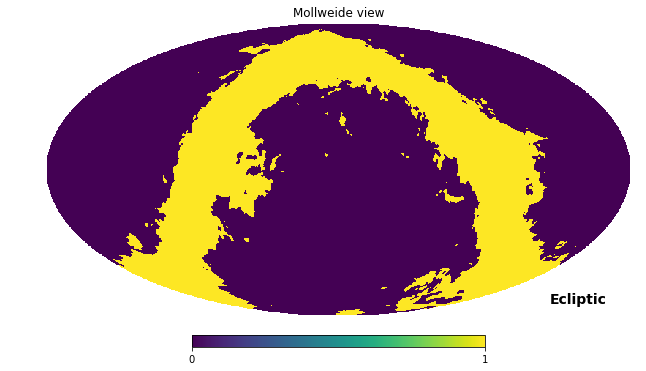

Threshold: 0.006


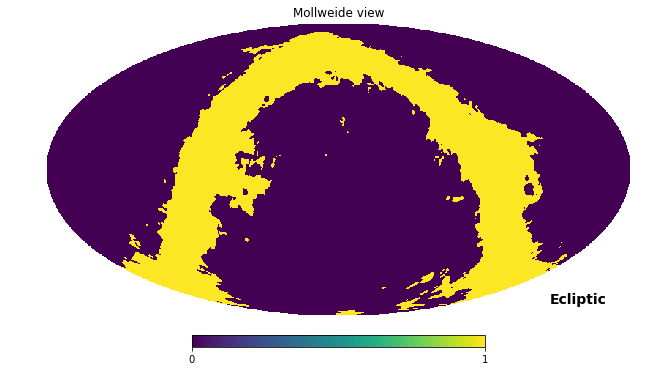

Threshold: 0.007


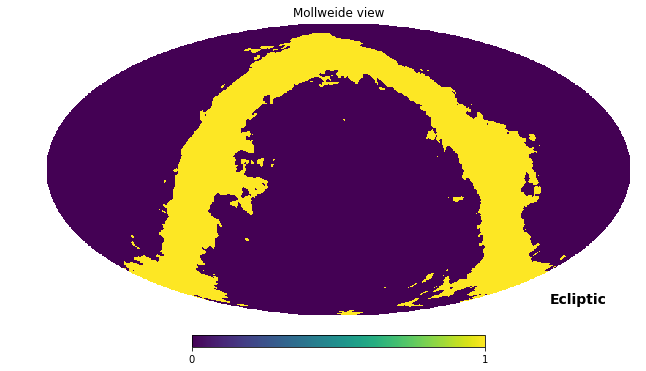

Threshold: 0.008


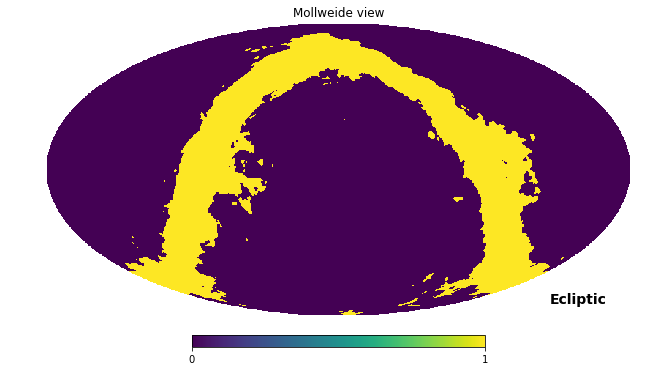

Threshold: 0.009000000000000001


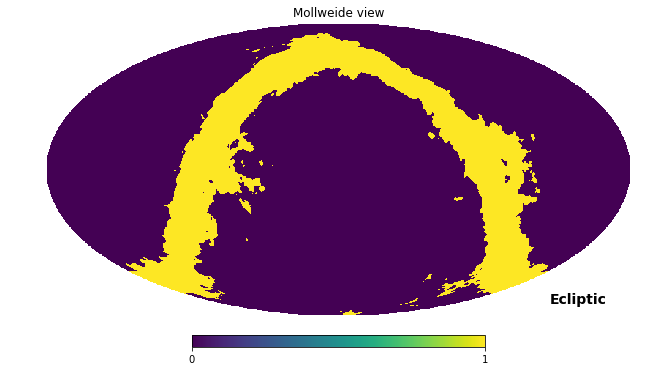

Threshold: 0.01


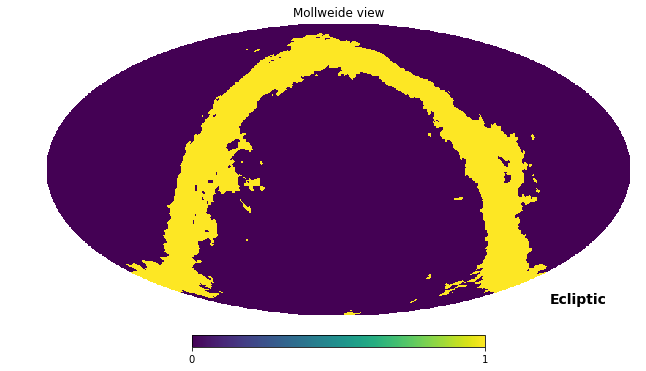

Threshold: 0.011


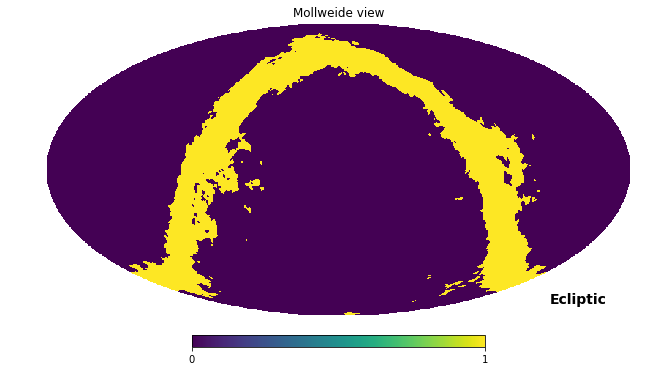

In [4]:
# THRESHOLD PARAMETERS
MIN_THRESHOLD = 0.005
MAX_THRESHOLD = 0.012
STEP = 0.001

# Clip the values
for THRESHOLD in np.arange(MIN_THRESHOLD, MAX_THRESHOLD, STEP):
    print("Threshold:", THRESHOLD)
    hfi353N = np.array(hfi353)
    hfi353N[hfi353N <= THRESHOLD] = 0
    hfi353N[hfi353N > THRESHOLD] = 1
    hp.mollview(hfi353N, coord="E")
    plt.show()

## Test selected threshold

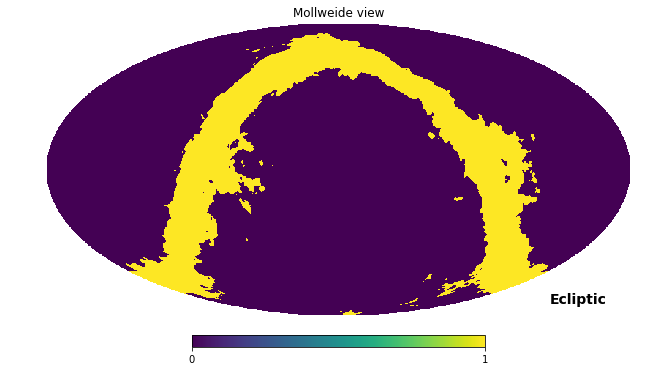

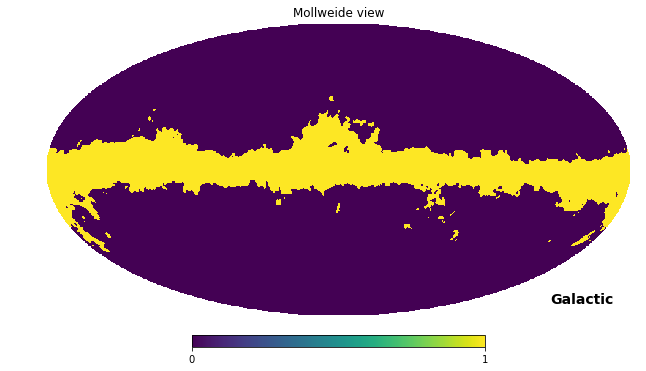

In [20]:
THRESHOLD = 0.009

hfi353N = np.array(hfi353)
hfi353N[hfi353N <= THRESHOLD] = 0
hfi353N[hfi353N > THRESHOLD] = 1

hp.mollview(hfi353N, coord="E")
hp.mollview(hfi353N, coord="EG")
plt.show()